# 데이터 종류 및 개수 확인

## 1. 기존 데이터셋 확인

In [1]:
from PIL import Image
import matplotlib.pylab as plt

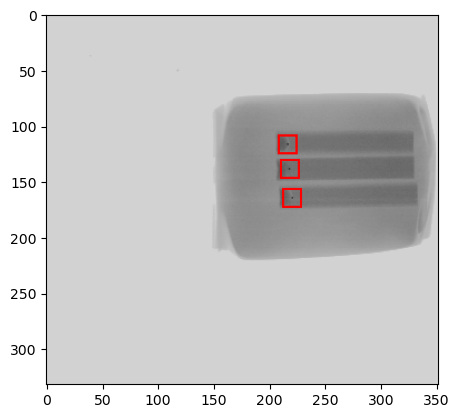

In [2]:
i = Image.open('C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/X선이물검출기(06.23_09.22)/1호기(2020.09.22)/SN77128_20200622_NgImage/002_20200622_203053(2).bmp')

plt.imshow(i)
plt.show()

## 2. 데이터셋 재정리

In [3]:
import os
import shutil

# 원본 이미지가 저장된 디렉토리의 경로
source_dir = 'C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/X선이물검출기(06.23_09.22)'

# 새로운 디렉토리 경로
target_dir_base = 'C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/X선이물검출기'

# 원본 디렉토리에서 각 '호기(2020.09.22)' 폴더를 순회
for i, ho_folder in enumerate(sorted(os.listdir(source_dir))):
    ho_folder_path = os.path.join(source_dir, ho_folder)
    
    # '호기' 폴더 내부를 확인하여 'NgImage' 폴더가 있는지 검사
    if os.path.isdir(ho_folder_path):
        for ng_folder in os.listdir(ho_folder_path):
            if 'NgImage' in ng_folder:
                ng_folder_path = os.path.join(ho_folder_path, ng_folder)
                
                # 해당 'NgImage' 폴더 내의 파일들을 복사할 새로운 '호기' 폴더 생성
                target_ho_folder = os.path.join(target_dir_base, f"{i+1}호기")
                os.makedirs(target_ho_folder, exist_ok=True)
                
                # 'NgImage' 폴더 내의 파일들을 새로운 위치로 복사
                for file in os.listdir(ng_folder_path):
                    source_file_path = os.path.join(ng_folder_path, file)
                    target_file_path = os.path.join(target_ho_folder, file)
                    shutil.copy(source_file_path, target_file_path)

print("파일 복사 완료.")


파일 복사 완료.


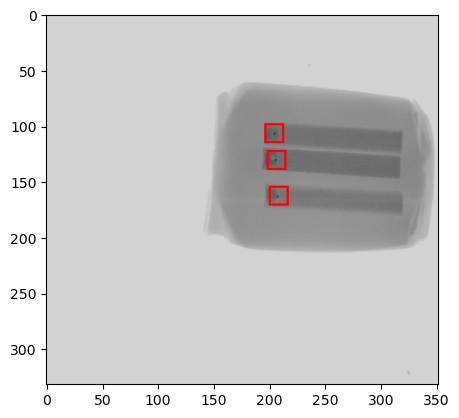

In [4]:
im = Image.open('C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/X선이물검출기/1호기/002_20200706_123038(9).bmp')

plt.imshow(im)
plt.show()

## 3.데이터 정제(전처리)

### 1. 결함데이터 좌표 입력을 위한 Labeling 실행

Labeling tools를 이용해 라벨링 작업후 폴더에 이동시킴

bmp 파일을 jpg 파일로 바꿔줌

In [6]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images
!ren *.* *.jpg*

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\images


In [8]:
import random
import os
import subprocess
import sys

In [16]:
import os
import random

def split_data_set(image_dir):
    # 테스트 세트와 훈련 세트 파일을 열기
    f_val = open('test.txt', 'w')
    f_train = open('train.txt', 'w')
    
    # 주어진 디렉토리에서 파일 목록을 얻기
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)
    
    # 데이터 세트의 크기를 기반으로 테스트 세트의 크기를 결정
    ind = 0
    data_test_size = int(0.2 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)
    
    for f in os.listdir(image_dir):
        # 파일이 JPEG 이미지인지 확인
        if f.endswith(".jpg"):
            ind += 1
            
            # 파일 인덱스가 테스트 배열에 있는 경우, 테스트 세트에 추가
            if ind in test_array:
                f_val.write(image_dir + "/" + f + '\n')
            else:
                # 그렇지 않으면 훈련 세트에 추가
                f_train.write(image_dir + '/' + f + '\n')

    # 파일 닫기
    f_val.close()
    f_train.close()


In [17]:
image_dir='C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images'

In [18]:
split_data_set(image_dir)

## 15개

In [55]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(epochs=15, batch_size=3, cfg='yolov3-spp.cfg', data='custom.data', multi_scale=False, img_size=[320, 640], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=False, weights='weights/last.pt', name='', device='cpu', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been trained for 806 epochs. Fine-tuning for 15 additional epochs.
Image sizes 320 - 640 train, 640 test
Using 3 dataloader workers
Starting training for 821 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for f

2024-03-04 14:55:00.246667: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


  0%|          | 0/12 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\train.txt (12 found, 0 missing, 0 empty, 0 duplicate, for 12 images): 100%|##########| 12/12 [00:00<00:00, 2399.37it/s]

  0%|          | 0/3 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (3 found, 0 missing, 0 empty, 0 duplicate, for 3 images): 100%|##########| 3/3 [00:00<00:00, 2985.27it/s]

  0%|          | 0/4 [00:00<?, ?it/s]2024-03-04 14:55:13.234800: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floa

In [35]:
import os

# 변경하고 싶은 디렉토리 경로
new_directory = 'C:\\Users\\mit017\\Desktop\\myproject\\XRAY_PROJECT\\XrayInspection\\dataset\\test1\\yolov3'

# 현재 작업 디렉토리 변경
os.chdir(new_directory)

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())


현재 작업 디렉토리: C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3


In [53]:
!pip install TensorFlow

In [54]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [56]:
!pip install tensorboard

In [65]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result

Namespace(cfg='yolov3-spp.cfg', names='classes.names', weights='weights/last.pt', source='images', output='result', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/15 images\001_20200622_203312(6).jpg: 416x512 Done. (0.505s)
image 2/15 images\001_20200623_003516(8).jpg: 416x512 Done. (0.421s)
image 3/15 images\001_20200901_003429(1).jpg: 416x512 Done. (0.415s)
image 4/15 images\001_20200922_163329(0).jpg: 416x512 Done. (0.412s)
image 5/15 images\001_20200922_163332(2).jpg: 416x512 Done. (0.428s)
image 6/15 images\002_20200714_043029(1).jpg: 512x512 1 defects, Done. (0.645s)
image 7/15 images\002_20200715_042416(9).jpg: 512x512 Done. (0.545s)
image 8/15 images\002_20200831_083545(0).jpg: 512x512 Done. (0.529s)
image 9/15 images\002_20200831_123134(5).jpg: 512x512 Done. (0.527s)
imag

C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [66]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=16, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all         3         7      0.78     0.571     0.675     0.659
Speed: 465.3/3.8/469.0 ms inference/NMS/total per 512x512 image at batch-size 3



  0%|          | 0/3 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (3 found, 0 missing, 0 empty, 0 duplicate, for 3 images): 100%|##########| 3/3 [00:00<00:00, 998.01it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:06<00:00,  6.16s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:06<00:00,  6.68s/it]


## 200개 

In [2]:
!python C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/199, path: input\002_20200622_203136(3).bmp
Welcome!
 Press [h] for help.
Showing image 1/199, path: input\002_20200622_203140(8).bmp
Showing image 1/199, path: input\002_20200622_203140(8).bmp
Showing image 2/199, path: input\002_20200622_203145(3).bmp
Showing image 2/199, path: input\002_20200622_203145(3).bmp
Showing image 3/199, path: input\002_20200622_203149(8).bmp
Showing image 3/199, path: input\002_20200622_203149(8).bmp
Showing image 4/199, path: input\002_20200622_203154(3).bmp
Showing image 4/199, path: input\002_20200622_203154(3).bmp
Showing image 5/199, path: input\002_20200622_203158(8).bmp
Showing image 5/199, path: input\002_20200622_203158(8).bmp
Showing image 6/199, path: input\002_20200623_003351(2).bmp
Showing image 6/199, path: input\002_20200623_003351(2).bmp
Showing image 7/199, path: input\002_20200623_003355(7).bmp
Showing image 7/199, path: input\002_20200623_003355(7).bmp
Showing image 8/199, path: input\

In [18]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images
!ren *.* *.jpg*

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\images


In [21]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3


In [22]:
import random
import os
import subprocess
import sys

def split_data_set(image_dir):
    # 테스트 세트와 훈련 세트 파일을 열기
    f_val = open('test.txt', 'w')
    f_train = open('train.txt', 'w')
    
    # 주어진 디렉토리에서 파일 목록을 얻기
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)
    
    # 데이터 세트의 크기를 기반으로 테스트 세트의 크기를 결정
    ind = 0
    data_test_size = int(0.2 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)
    
    for f in os.listdir(image_dir):
        # 파일이 JPEG 이미지인지 확인
        if f.endswith(".jpg"):
            ind += 1
            
            # 파일 인덱스가 테스트 배열에 있는 경우, 테스트 세트에 추가
            if ind in test_array:
                f_val.write(image_dir + "/" + f + '\n')
            else:
                # 그렇지 않으면 훈련 세트에 추가
                f_train.write(image_dir + '/' + f + '\n')

    # 파일 닫기
    f_val.close()
    f_train.close()

In [23]:
image_dir='C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images'

In [24]:
import random
import os
import subprocess
import sys

split_data_set(image_dir)

In [16]:
!python splitdata.py images

In [17]:
split_data_set(image_dir)

In [26]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [27]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex

2024-03-04 16:07:36.276218: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


  0%|          | 0/160 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\train.txt (160 found, 0 missing, 0 empty, 0 duplicate, for 160 images): 100%|##########| 160/160 [00:00<00:00, 2755.23it/s]

  0%|          | 0/40 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100%|##########| 40/40 [00:00<00:00, 2852.54it/s]
2024-03-04 16:07:48.962792: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors 


Namespace(epochs=15, batch_size=3, cfg='yolov3-spp.cfg', data='custom.data', multi_scale=False, img_size=[320, 640], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=False, weights='weights/last.pt', name='', device='cpu', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been trained for 820 epochs. Fine-tuning for 15 additional epochs.
Image sizes 320 - 640 train, 640 test
Using 3 dataloader workers
Starting training for 835 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for 

In [32]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result 

Namespace(cfg='yolov3-spp.cfg', names='classes.names', weights='weights/last.pt', source='images', output='result', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/200 images\002_20200622_203136(3).jpg: 512x512 3 defects, Done. (0.518s)
image 2/200 images\002_20200622_203140(8).jpg: 512x512 3 defects, Done. (0.483s)
image 3/200 images\002_20200622_203145(3).jpg: 512x512 3 defects, Done. (0.504s)
image 4/200 images\002_20200622_203149(8).jpg: 512x512 3 defects, Done. (0.489s)
image 5/200 images\002_20200622_203154(3).jpg: 512x512 3 defects, Done. (0.487s)
image 6/200 images\002_20200622_203158(8).jpg: 512x512 2 defects, Done. (0.463s)
image 7/200 images\002_20200623_003351(2).jpg: 512x512 3 defects, Done. (0.499s)
image 8/200 images\002_20200623_003355(7).jpg: 512x512 2 defects, Don

C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [34]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=16, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all        40       120     0.881     0.933     0.885     0.907
Speed: 441.4/3.6/445.0 ms inference/NMS/total per 512x512 image at batch-size 16



  0%|          | 0/40 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100%|##########| 40/40 [00:00<00:00, 1442.78it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1:  33%|###3      | 1/3 [00:40<01:21, 40.59s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1:  67%|######6   | 2/3 [00:47<00:20, 20.97s/it]
               Class    Images   Targets         P

## 50개

In [2]:
!python C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/49, path: input\002_20200622_203136(3).bmp
Welcome!
 Press [h] for help.
Showing image 1/49, path: input\002_20200622_203140(8).bmp
Showing image 1/49, path: input\002_20200622_203140(8).bmp
Showing image 2/49, path: input\002_20200622_203145(3).bmp
Showing image 2/49, path: input\002_20200622_203145(3).bmp
Showing image 3/49, path: input\002_20200622_203149(8).bmp
Showing image 3/49, path: input\002_20200622_203149(8).bmp
Showing image 4/49, path: input\002_20200622_203154(3).bmp
Showing image 4/49, path: input\002_20200622_203154(3).bmp
Showing image 5/49, path: input\002_20200622_203158(8).bmp
Showing image 5/49, path: input\002_20200622_203158(8).bmp
Showing image 6/49, path: input\002_20200623_003351(2).bmp
Showing image 6/49, path: input\002_20200623_003351(2).bmp
Showing image 7/49, path: input\002_20200623_003355(7).bmp
Showing image 7/49, path: input\002_20200623_003355(7).bmp
Showing image 8/49, path: input\002_20200623_003

In [3]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3


In [4]:
import random
import os
import subprocess
import sys

def split_data_set(image_dir):
    # 테스트 세트와 훈련 세트 파일을 열기
    f_val = open('test.txt', 'w')
    f_train = open('train.txt', 'w')
    
    # 주어진 디렉토리에서 파일 목록을 얻기
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)
    
    # 데이터 세트의 크기를 기반으로 테스트 세트의 크기를 결정
    ind = 0
    data_test_size = int(0.2 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)
    
    for f in os.listdir(image_dir):
        # 파일이 JPEG 이미지인지 확인
        if f.endswith(".jpg"):
            ind += 1
            
            # 파일 인덱스가 테스트 배열에 있는 경우, 테스트 세트에 추가
            if ind in test_array:
                f_val.write(image_dir + "/" + f + '\n')
            else:
                # 그렇지 않으면 훈련 세트에 추가
                f_train.write(image_dir + '/' + f + '\n')

    # 파일 닫기
    f_val.close()
    f_train.close()

In [5]:
image_dir='C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images'

import random
import os
import subprocess
import sys

split_data_set(image_dir)

In [6]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(epochs=15, batch_size=3, cfg='yolov3-spp.cfg', data='custom.data', multi_scale=False, img_size=[320, 640], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=False, weights='weights/last.pt', name='', device='cpu', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been trained for 834 epochs. Fine-tuning for 15 additional epochs.
Image sizes 320 - 640 train, 640 test
Using 3 dataloader workers
Starting training for 849 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for f

2024-03-05 09:23:58.983323: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Reading image shapes: 100%|##########| 40/40 [00:00<00:00, 535.80it/s]

  0%|          | 0/40 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\train.txt (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100%|##########| 40/40 [00:00<00:00, 594.22it/s]

Reading image shapes: 100%|##########| 10/10 [00:00<00:00, 509.01it/s]

  0%|          | 0/10 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (10 found, 0 missing, 0 empty, 0 duplicate, for 10 images): 100%|##########| 10/10 [00:00<00:00, 408.51it/s]
2024-03-05 09:24:15.786544: I tensorflow/core/ut

In [8]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result 

Namespace(cfg='yolov3-spp.cfg', names='classes.names', weights='weights/last.pt', source='images', output='result', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/50 images\002_20200622_203136(3).jpg: 512x512 3 defects, Done. (0.670s)
image 2/50 images\002_20200622_203140(8).jpg: 512x512 2 defects, Done. (0.569s)
image 3/50 images\002_20200622_203145(3).jpg: 512x512 3 defects, Done. (0.504s)
image 4/50 images\002_20200622_203149(8).jpg: 512x512 3 defects, Done. (0.487s)
image 5/50 images\002_20200622_203154(3).jpg: 512x512 2 defects, Done. (0.491s)
image 6/50 images\002_20200622_203158(8).jpg: 512x512 2 defects, Done. (0.487s)
image 7/50 images\002_20200623_003351(2).jpg: 512x512 3 defects, Done. (0.502s)
image 8/50 images\002_20200623_003355(7).jpg: 512x512 2 defects, Done. (0.49

C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=16, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all        10        30     0.936     0.933     0.963     0.935
Speed: 460.7/3.1/463.8 ms inference/NMS/total per 512x512 image at batch-size 10



  0%|          | 0/10 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (10 found, 0 missing, 0 empty, 0 duplicate, for 10 images): 100%|##########| 10/10 [00:00<00:00, 3368.11it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:10<00:00, 10.90s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:11<00:00, 11.88s/it]


결과 정리<br>
15 :  0.78     0.571     0.675     0.659 <br>
200: 0.881     0.933     0.885     0.907 <br>
50: 0.936     0.933     0.963     0.935

## 100개

In [10]:
!python C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/99, path: input\002_20200622_203136(3).bmp
Welcome!
 Press [h] for help.
Showing image 1/99, path: input\002_20200622_203140(8).bmp
Showing image 1/99, path: input\002_20200622_203140(8).bmp
Showing image 2/99, path: input\002_20200622_203145(3).bmp
Showing image 2/99, path: input\002_20200622_203145(3).bmp
Showing image 3/99, path: input\002_20200622_203149(8).bmp
Showing image 3/99, path: input\002_20200622_203149(8).bmp
Showing image 4/99, path: input\002_20200622_203154(3).bmp
Showing image 4/99, path: input\002_20200622_203154(3).bmp
Showing image 5/99, path: input\002_20200622_203158(8).bmp
Showing image 5/99, path: input\002_20200622_203158(8).bmp
Showing image 6/99, path: input\002_20200623_003351(2).bmp
Showing image 6/99, path: input\002_20200623_003351(2).bmp
Showing image 7/99, path: input\002_20200623_003355(7).bmp
Showing image 7/99, path: input\002_20200623_003355(7).bmp
Showing image 8/99, path: input\002_20200623_003

In [11]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3


In [12]:
image_dir='C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images'

import random
import os
import subprocess
import sys

split_data_set(image_dir)

In [13]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(epochs=15, batch_size=3, cfg='yolov3-spp.cfg', data='custom.data', multi_scale=False, img_size=[320, 640], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=False, weights='weights/last.pt', name='', device='cpu', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been trained for 848 epochs. Fine-tuning for 15 additional epochs.
Image sizes 320 - 640 train, 640 test
Using 3 dataloader workers
Starting training for 863 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for f

2024-03-05 09:55:27.594686: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Reading image shapes: 100%|##########| 39/39 [00:00<00:00, 1499.31it/s]

  0%|          | 0/39 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\train.txt (39 found, 0 missing, 0 empty, 0 duplicate, for 39 images): 100%|##########| 39/39 [00:00<00:00, 2051.16it/s]

Reading image shapes: 100%|##########| 11/11 [00:00<00:00, 2748.23it/s]

  0%|          | 0/11 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (11 found, 0 missing, 0 empty, 0 duplicate, for 11 images): 100%|##########| 11/11 [00:00<00:00, 2437.65it/s]
2024-03-05 09:55:39.968893: I tensorflow/cor

In [14]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result 

Namespace(cfg='yolov3-spp.cfg', names='classes.names', weights='weights/last.pt', source='images', output='result', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/100 images\002_20200622_203136(3).jpg: 512x512 3 defects, Done. (0.531s)
image 2/100 images\002_20200622_203140(8).jpg: 512x512 2 defects, Done. (0.651s)
image 3/100 images\002_20200622_203145(3).jpg: 512x512 3 defects, Done. (0.469s)
image 4/100 images\002_20200622_203149(8).jpg: 512x512 3 defects, Done. (0.504s)
image 5/100 images\002_20200622_203154(3).jpg: 512x512 2 defects, Done. (0.495s)
image 6/100 images\002_20200622_203158(8).jpg: 512x512 2 defects, Done. (0.533s)
image 7/100 images\002_20200623_003351(2).jpg: 512x512 3 defects, Done. (0.497s)
image 8/100 images\002_20200623_003355(7).jpg: 512x512 3 defects, Don

C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [15]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=16, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all        11        33     0.883     0.909     0.843     0.896
Speed: 465.3/2.6/467.9 ms inference/NMS/total per 512x512 image at batch-size 11



  0%|          | 0/11 [00:00<?, ?it/s]
Caching labels C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3\test.txt (11 found, 0 missing, 0 empty, 0 duplicate, for 11 images): 100%|##########| 11/11 [00:00<00:00, 2435.07it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\mit017\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:11<00:00, 11.85s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:12<00:00, 12.85s/it]


결과 정리<br>
15 :  0.78     0.571     0.675     0.659 <br>
50: 0.936     0.933     0.963     0.935 <br>
100 : 0.883     0.909     0.843     0.896<br>
200: 0.881     0.933     0.885     0.907 <br>

## 300개

In [16]:
!python C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/299, path: input\001_20200622_203305(8).jpg
Welcome!
 Press [h] for help.
Showing image 1/299, path: input\001_20200622_203309(1).jpg
Showing image 1/299, path: input\001_20200622_203309(1).jpg
Showing image 2/299, path: input\001_20200622_203312(6).jpg
Showing image 2/299, path: input\001_20200622_203312(6).jpg
Showing image 3/299, path: input\001_20200622_203316(0).jpg
Showing image 3/299, path: input\001_20200622_203316(0).jpg
Showing image 4/299, path: input\001_20200622_203319(4).jpg
Showing image 4/299, path: input\001_20200622_203319(4).jpg
Showing image 5/299, path: input\001_20200622_203330(3).jpg
Showing image 5/299, path: input\001_20200622_203330(3).jpg
Showing image 6/299, path: input\001_20200623_003516(8).jpg
Showing image 6/299, path: input\001_20200623_003516(8).jpg
Showing image 7/299, path: input\001_20200623_003520(5).jpg
Showing image 7/299, path: input\001_20200623_003520(5).jpg
Showing image 8/299, path: input\

In [17]:
%cd C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/

C:\Users\mit017\Desktop\myproject\XRAY_PROJECT\XrayInspection\dataset\test1\yolov3


In [18]:
image_dir='C:/Users/mit017/Desktop/myproject/XRAY_PROJECT/XrayInspection/dataset/test1/yolov3/images'

import random
import os
import subprocess
import sys

split_data_set(image_dir)

In [ ]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

In [ ]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result 

In [ ]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 